In [1]:
import pandas as pd

# slide 2

In [3]:
all_df = pd.read_csv('apt_nationwide.csv',encoding='cp949',thousands=',');all_df.head()
# 전국 아파트 매매가 데이터 

,지 역,2019년 07월,2019년 08월,2019년 09월,2019년 10월,2019년 11월,2019년 12월,2020년 01월,2020년 02월,2020년 03월,2020년 04월,2020년 05월,2020년 06월
0,전국,4270,4270,4275,4291,4313,4358,4585,4609,4650,4666,4670,4697
1,수도권,5999,6006,6020,6052,6092,6172,6562,6600,6671,6699,6707,6743
2,지방권,2643,2638,2634,2634,2639,2651,2726,2736,2748,2753,2754,2773
3,6대광역시,3286,3284,3287,3293,3306,3329,3471,3488,3525,3543,3553,3580
4,5대광역시,3240,3239,3240,3247,3260,3284,3402,3417,3429,3434,3436,3458


In [4]:
apart = all_df
ji = apart['지 역']
apart.index = ji
apart = apart.drop('지 역',axis=1)
apart_1 = pd.DataFrame(apart['2020년 06월'])
apart_2 = apart_1.iloc[7:]

In [7]:
import plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

In [8]:
apart_2.iplot(kind='bar')
# 전국 아파트 매매가격 막대 그래프

# slide 4

In [56]:
wage = pd.read_csv('wage.csv',encoding='cp949',thousands=',');wage.head()
# 전국 광역시도별 평균임금 데이터

,region,worker,wage
0,서울,1040,466.25
1,경기,1377,275.61
2,인천,347,240.03
3,강원도,125,232.47
4,충북,172,207.59


In [57]:
fig = px.bar(wage, x='region', y='wage', color='region')
fig.show()

# silde 11

In [18]:
region_pop = pd.read_csv('region_pop.csv',encoding='cp949',thousands=',');region_pop.head(3)
# 자치구별 연령별 거주인구 데이터

,zone,region,people,youth,senior,r_youth,age_2024,age_2529,age_3034,age_3539,age_4044,age_4549,age_5054,age_5559,age_6064,age_6569,age_7074,age_7579,age_80up
0,도심권,종로구,144958,33192,66889,23,10609,12614,9969,9811,9582,12292,12348,12181,10675,7729,6204,5550,6270
1,도심권,중구,121928,28467,57335,23,7725,10687,10055,10040,8477,9308,9930,10158,9422,6951,5439,4580,5032
2,도심권,용산구,219545,51420,103245,23,13640,19209,18571,18812,16134,18313,17759,16908,15319,10737,8491,7265,8761


In [14]:
import plotly.express as px
# plotly.express를 px로 import

In [15]:
fig = px.scatter(region_pop, x="region", y="youth", color="r_youth", size="people")
fig.show()
# 자치구별 청년인구(20~34세) 산점도(점의 색깔은 각 자치구 전체인구 중 청년인구의 비율 / 점의 크기는 자치구 전체인구)

In [23]:
fig = px.scatter(region_pop, x="youth", y="senior", text="region", size='r_youth', color="zone")
fig.show()
# 청년인구와 장년층 인구(35~64세)의 상관관계를 산점도로 표현(점의 색깔은 권역별로, 점의 크기는 자치구 전체인구 중 청년인구의 비중)

# slide 14

In [25]:
apt = pd.read_csv('all_price.csv',encoding='utf-8',thousands=',');apt.head(3)
#권역별 주거형태(아파트, 연립다세대, 오피스텔, 단독주택)의 매매, 전세, 월세 가격 데이터

,type,zone,deal_price,year_price,month_price,deposit_price,people,2024ratio,age_2024,age_2529,...,man_total,man_youth,man_2024,man_2529,man_3034,wo_total,wo_youth,wo_2024,wo_2529,wo_3034
0,연립다세대,도심권,6099,3816,724,51556,113079,28,31974,42510,...,236726,55256,14990,21051,19215,249705,57823,16984,21459,19380
1,연립다세대,동북권,4714,3263,492,39796,648941,32,208578,237872,...,1440455,323214,100770,120364,102080,1512887,325727,107808,117508,100411
2,연립다세대,서북권,5136,3488,583,32728,262461,30,78302,98456,...,546798,124871,36504,47173,41194,597682,137590,41798,51283,44509


In [28]:
apt1 = apt.loc[apt['type'] == '아파트'][['zone','month_price']];apt1
# 권역별 주거형태의 월세 데이터 중 주거형태(type)가 아파트인 경우만 추출 

,zone,month_price
20,도심권,5111
21,동북권,7324
22,서북권,3026
23,서남권,6396
24,동남권,5989


In [29]:
import plotly.express as px

In [30]:
fig = px.bar(apt1,x="zone", y="month_price",text='month_price')
fig.show()
# 권역별 아파트 월세가격 막대그래프

# slide 15

In [31]:
apt2 = apt.loc[apt['type'] != '아파트'];apt2
# 권역별 주거형태 데이터 중 주거형태(type)가 아파트인 경우를 제외한 데이터(연립다세대, 단독주택, 오피스텔의 매매, 전세, 월세 데이터) 

,type,zone,deal_price,year_price,month_price,deposit_price,people,2024ratio,age_2024,age_2529,...,man_total,man_youth,man_2024,man_2529,man_3034,wo_total,wo_youth,wo_2024,wo_2529,wo_3034
0,연립다세대,도심권,6099,3816,724,51556,113079,28,31974,42510,...,236726,55256,14990,21051,19215,249705,57823,16984,21459,19380
1,연립다세대,동북권,4714,3263,492,39796,648941,32,208578,237872,...,1440455,323214,100770,120364,102080,1512887,325727,107808,117508,100411
2,연립다세대,서북권,5136,3488,583,32728,262461,30,78302,98456,...,546798,124871,36504,47173,41194,597682,137590,41798,51283,44509
3,연립다세대,서남권,4721,3568,496,38658,712059,27,193396,279245,...,1432831,353960,92064,137958,123938,1476505,358099,101332,141287,115480
4,연립다세대,동남권,7378,5007,630,74420,441769,29,126168,159003,...,996371,211995,61880,75543,74572,1066847,229774,64288,83460,82026
5,단독주택,도심권,8585,3220,1261,98541,113079,28,31974,42510,...,236726,55256,14990,21051,19215,249705,57823,16984,21459,19380
6,단독주택,동북권,5752,2977,1087,127000,648941,32,208578,237872,...,1440455,323214,100770,120364,102080,1512887,325727,107808,117508,100411
7,단독주택,서북권,6815,3035,1448,114447,262461,30,78302,98456,...,546798,124871,36504,47173,41194,597682,137590,41798,51283,44509
8,단독주택,서남권,5631,2723,1376,99029,712059,27,193396,279245,...,1432831,353960,92064,137958,123938,1476505,358099,101332,141287,115480
9,단독주택,동남권,10110,4025,2188,306662,441769,29,126168,159003,...,996371,211995,61880,75543,74572,1066847,229774,64288,83460,82026


In [32]:
fig = px.line(apt2, x='zone',y='month_price',text='month_price',color='type')
fig.show()
# 권역별 아파트 제외한 주거형태의 월세 꺾은선 그래프 

# slide 16

In [33]:
fig = px.line(apt, x='zone',y='year_price',text='year_price',color='type')
fig.show()
# 권역별 주거형태(아파트 포함)의 전세가 꺾은선 그래프 

# slide 17

In [34]:
fig = px.line(apt2, x='zone',y='year_price',text='year_price',color='type')
fig.show()
# 권역별 아파트 제외한 주거형태(apt2 데이터프레임)의 전세가 꺾은선 그래프 

In [55]:
fig = px.line(apt2, x='zone',y='deal_price',text='deal_price',color='type')
fig.show()
# 권역별 아파트 제외한 주거형태(apt2 데이터프레임)의 매매가 꺾은선 그래프 

# slide 19
### 직종별 평균연봉 막대그래프 그리기

In [63]:
industrial = pd.read_csv('industrial.csv',encoding='cp949',thousands=',');wage.head()
# 직종별 평균연봉 데이터

                    industrial     wage
0                         B.광업  4218750
1                        C.제조업  3566471
2     D.전기, 가스, 증기 및 공기 조절 공급업  5399186
3    E.수도, 하수 및 폐기물 처리, 원료 재생업  3626588
4                        F.건설업  2936683
5                   G.도매 및 소매업  3216778
6                   H.운수 및 창고업  3192941
7                  I.숙박 및 음식점업  1827236
8                      J.정보통신업  4379708
9                   K.금융 및 보험업  5923102
10                      L.부동산업  2685079
11          M.전문, 과학 및 기술 서비스업  4515073
12  N.사업시설 관리, 사업 지원 및 임대 서비스업  2358069
13                   P.교육 서비스업  3178558
14           Q.보건업 및 사회복지 서비스업  2887818
15       R.예술, 스포츠 및 여가관련 서비스업  2682215
16  S.협회 및 단체, 수리 및 기타 개인 서비스업  2460445


In [62]:
fig = px.bar(industrial, x='wage', y='industrial', color='industrial',text='wage', orientation='h')
fig.show()

# slide 21
### 금융, 예체능, IT직종의 평균연봉으로 자치구별 아파트 매매까지 걸리는 시간을 계산하고 
### 해당 데이터를 데이터프레임으로 만들어서 막대그래프로 출력하는 코드

In [45]:
apt3 = pd.read_csv('apt_price.csv',encoding='utf-8',thousands=',');apt3
# 자치구별 아파트 매매, 전세, 월세 데이터프레임

,type,area,zone,region,deal_price,year_price,month_price,deposit_price
0,아파트,강북지역,도심권,종로구,10613,6462,1499,106627
1,아파트,강북지역,도심권,중구,10181,6565,1547,53334
2,아파트,강북지역,도심권,용산구,14186,6303,2065,73964
3,아파트,강북지역,동북권,성동구,11032,6278,1433,60220
4,아파트,강북지역,동북권,광진구,11124,6540,1256,167633
5,아파트,강북지역,동북권,동대문구,8319,5055,838,118320
6,아파트,강북지역,동북권,중랑구,6325,4329,854,67906
7,아파트,강북지역,동북권,성북구,7642,5026,1003,64847
8,아파트,강북지역,동북권,강북구,6414,4106,852,51535
9,아파트,강북지역,동북권,도봉구,6145,3652,395,144747


In [46]:
apt3 = apt3[['region','deal_price','month_price','year_price']];apt3
# 자치구별 아파트 매매, 전세, 월세 데이터프레임에서 필요한 변수만 추출

,region,deal_price,month_price,year_price
0,종로구,10613,1499,6462
1,중구,10181,1547,6565
2,용산구,14186,2065,6303
3,성동구,11032,1433,6278
4,광진구,11124,1256,6540
5,동대문구,8319,838,5055
6,중랑구,6325,854,4329
7,성북구,7642,1003,5026
8,강북구,6414,852,4106
9,도봉구,6145,395,3652


In [47]:
import numpy as np

In [54]:
# 직종별 서울 주거형태별로 매매하기까지 필요한 시간 계산 Code

# 주거형태 및 구매 조건 입력 코드 _ 시작
year =[5923102 * 12,2682215 * 12,36449100]
area = 24
tt = input('단독주택/연립다세대/오피스텔(40이하)/오피스텔(40초과)/아파트: ')
if tt == '아파트':
    test = apt3
else:
    test = apt.loc[apt.type==tt]
dym = input('매매/전세/월세: ')
if dym == '매매':
    test = test['deal_price']
elif dym == '전세':
    test = test['year_price']
elif dym == '월세':
    test = test['month_price']
## 주거형태 미 구매 조건 입력 코드ㅡ _ 종료

# 주거형태가 아파트인 경우 금융, 예체능, IT직종별로 소요되는 시간 계산 및 시각화
if tt =='아파트':
    rs = []
    rs2 = []
    rs3 = []
    for i in range(25):
        money = test.iloc[i]
        #print(test.index[i],'에 살면 평균적으로',(money*1000*area*3.3)//(year-1500*10000),"년 걸립니다.")
        rs.append((money*1000*area*3.3)//(year[0]-1500*10000))
        rs2.append((money*1000*area*3.3)//(year[1]-1500*10000))
        rs3.append((money*1000*area*3.3)//(year[2]-1500*10000))
    rs = np.array(rs)
    rs2 = np.array(rs2)
    rs3 = np.array(rs3)
    rs4 = [rs,rs2,rs3]
    result = pd.DataFrame({'금융':rs,'예체능':rs2,'IT산업':rs3},index=test.index)
    #print(result)
    result.iplot(kind='bar')
else:
    test.index = ['도심권','동북권','서북권','서남권','동남권']
    for i in range(5):
        money = test.iloc[i]
        print(test.index[i],'에 살면 평균적으로',(money*1000*area*3.3)//((year-1500)*10000),"년 걸립니다.")


단독주택/연립다세대/오피스텔(40이하)/오피스텔(40초과)/아파트: 아파트
매매/전세/월세: 전세


# slide 22

In [49]:
fig = px.line(apt3, x='region',y='deal_price',text='deal_price')
fig.show()
# 자치구별 아파트 매매가격 꺾은선 그래프

# slide 23

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


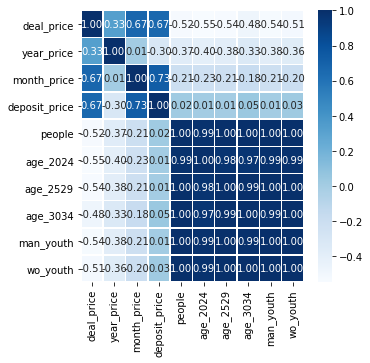

In [40]:
plt.figure(figsize=(5,5))
sns.heatmap(data=apt2[['deal_price','year_price','month_price','deposit_price','people','age_2024','age_2529','age_3034','man_youth','wo_youth']].corr(),annot=True,fmt='.2f',linewidths=0.5,cmap='Blues')
# apt2 데이터프레임내에서 매매, 전세, 월세, 보증금, 인구수, 연령병 인구수 등의 상관관계 분석